In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

sns.set_theme('paper')

In [3]:
data = pd.read_csv('Heart_Rate_Data.csv')

In [3]:
data

,Time,Values
0,27-03-2022,69
1,28-03-2022,69
2,29-03-2022,68
3,30-03-2022,67
4,31-03-2022,67
...,...,...
1096,27-03-2025,112
1097,28-03-2025,118
1098,29-03-2025,111
1099,30-03-2025,85


In [4]:
data.describe()

,Values
count,1101.000000
mean,77.035422
std,9.765785
min,58.000000
25%,69.000000
50%,78.000000
75%,84.000000
max,118.000000


In [5]:
data['Time'] = pd.to_datetime(data['Time'],dayfirst=True)

In [6]:
data.set_index('Time',inplace=True)

In [7]:
data.head()

,Values
Time,
2022-03-27,69
2022-03-28,69
2022-03-29,68
2022-03-30,67
2022-03-31,67


In [8]:
data.isnull().sum()

Values    0
dtype: int64

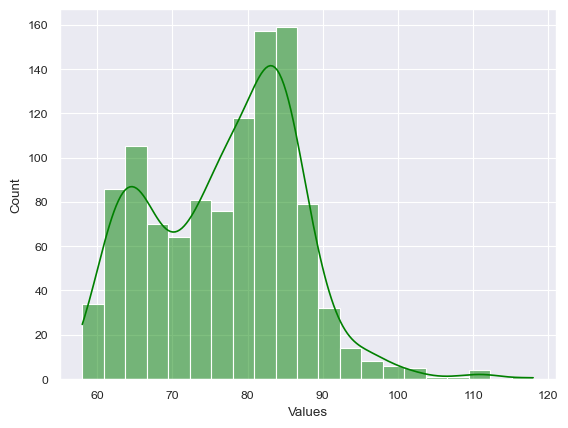

In [9]:
sns.histplot(data['Values'],kde=True,color='green');

The data is distributed in between 60-100 and peaked between 80-90

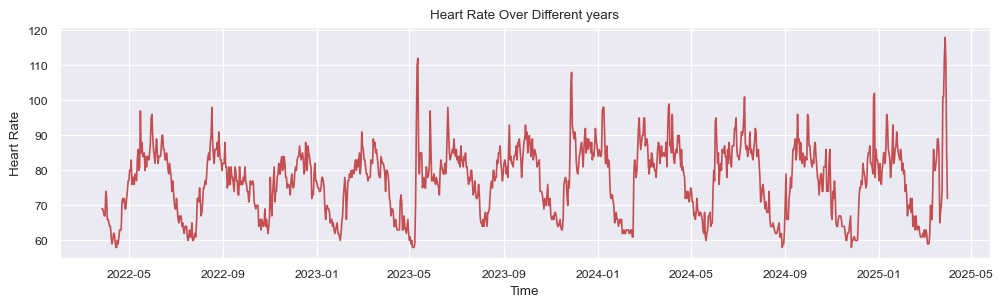

In [10]:
plt.figure(figsize=(12,3))
sns.lineplot(data=data,x=data.index,y='Values',color='r')
plt.title('Heart Rate Over Different years')
plt.ylabel('Heart Rate');

It seems like the data is seasonal. Noise is present on specific days.

In [11]:
data['year'] = data.index.year
data['month'] = data.index.month
data['day_of_week'] = data.index.day_of_week

data = data.iloc[:,[1,2,3,0]]

In [12]:
day_avg = data.loc[:,['day_of_week','Values']].groupby('day_of_week').mean()
day_avg

,Values
day_of_week,
0,77.031646
1,77.292994
2,76.853503
3,76.917197
4,76.949045
5,77.280255
6,76.924051


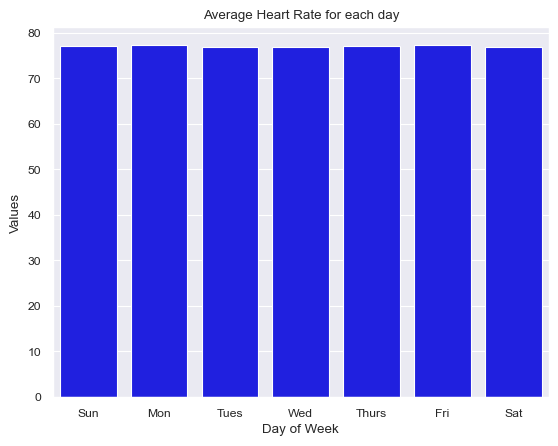

In [13]:
sns.barplot(data=day_avg,x=day_avg.index,y='Values',color='blue')
plt.title('Average Heart Rate for each day')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Sun','Mon','Tues','Wed','Thurs','Fri','Sat']);
plt.xlabel('Day of Week')
plt.show()

The average of heart rate is almost same in each day and is approximately equal to 78. It means the day of the week does not affect the heart rate.

In [14]:
year_and_month = data.iloc[:,[0,1,3]].groupby(['year','month']).mean()
year_and_month

Values
year month           
2022 3      68.000000
     4      65.566667
     5      83.064516
     6      82.400000
     7      64.612903
     8      81.677419
     9      78.166667
     10     69.161290
     11     77.333333
     12     81.064516
2023 1      68.548387
     2      77.428571
     3      81.838710
     4      67.700000
     5      77.161290
     6      81.866667
     7      79.258065
     8      74.032258
     9      84.533333
     10     79.354839
     11     73.333333
     12     86.290323
2024 1      77.870968
     2      73.034483
     3      84.677419
     4      83.300000
     5      67.548387
     6      85.266667
     7      86.419355
     8      65.709677
     9      81.600000
     10     80.483871
     11     64.833333
     12     78.322581
2025 1      84.290323
     2      67.928571
     3      78.000000

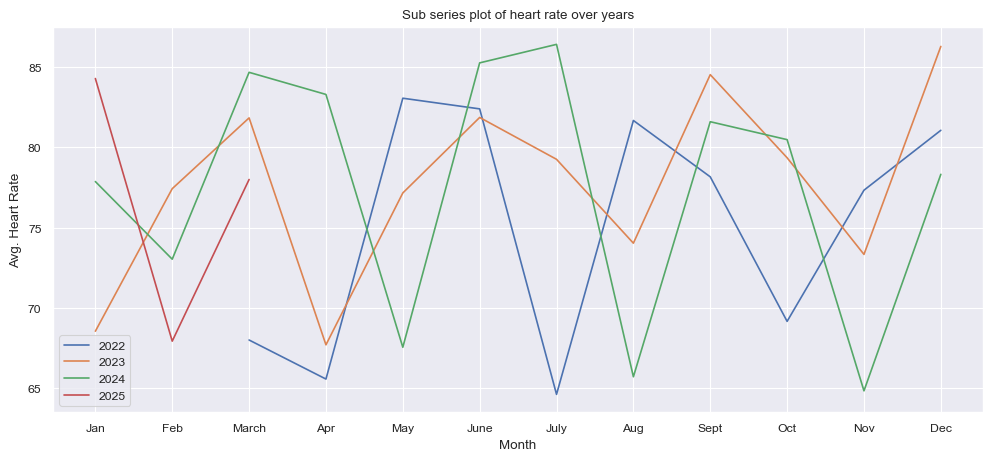

In [15]:
plt.figure(figsize=(12,5))

plt.plot([i for i in range(3,13)],year_and_month.loc[(2022,)].values.flatten(),label=2022)
for i in range(2023,2025):
    x = list(set(year_and_month.index.get_level_values('month')))
    y = year_and_month.loc[(i,)].values.flatten()

    plt.plot(x,y,label=i)

plt.plot([i for i in range(1,4)],year_and_month.loc[(2025,)].values.flatten(),label=2025)
plt.title("Sub series plot of heart rate over years")
plt.xlabel("Month")
plt.ylabel("Avg. Heart Rate")
plt.xticks(range(1,13),['Jan','Feb','March','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.legend();

This is a Sub series plot of heart rate over different years. Once again we can conclude that there is seasonality in the data but due to random noise, there is some irregular stationarity.

In [16]:
month_and_day = data.iloc[:,[1,2,3]].groupby(['month','day_of_week']).mean()
month_and_day

Values
month day_of_week           
1     0            77.142857
      1            76.500000
      2            76.428571
      3            76.153846
      4            76.692308
...                      ...
12    2            82.666667
      3            82.923077
      4            82.928571
      5            83.785714
      6            80.785714

[84 rows x 1 columns]

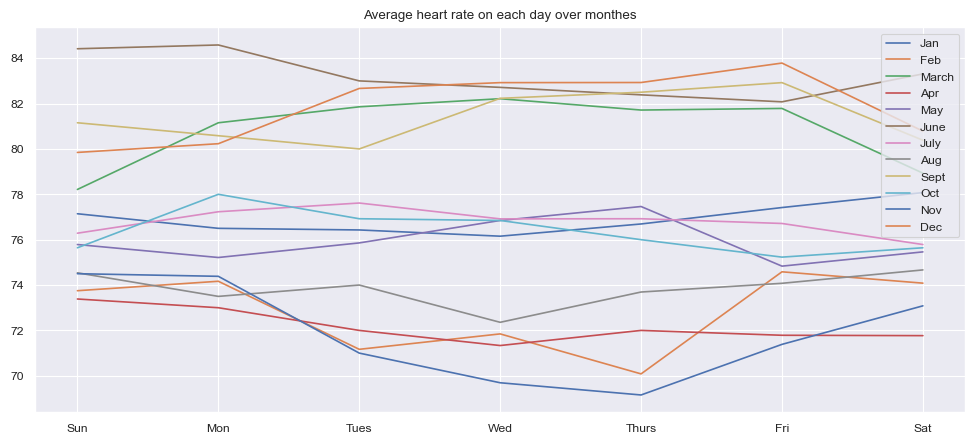

In [17]:
months = {1:'Jan',2:'Feb',3:'March',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}

plt.figure(figsize=(12,5))
for i in range(1,13):
    x = month_and_day.index.get_level_values('day_of_week').unique()
    y = month_and_day.loc[(i,)]
    
    plt.plot(x,y,label=months[i])
    plt.legend(loc=1)

plt.title("Average heart rate on each day over monthes")
plt.xticks(range(7),['Sun','Mon','Tues','Wed','Thurs','Fri','Sat']);

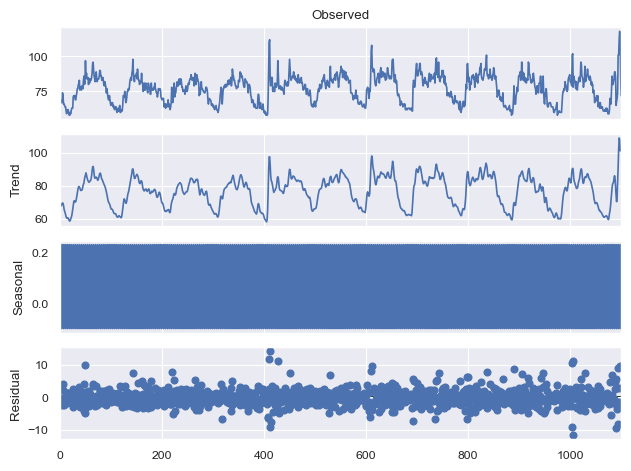

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(model='additive',x=data['Values'].values,period=4)

result.plot();

From the above additive decomposition, we conclude that some trend is present in the data along with seasonality and residuals.

First, we should smooth the data. By smoothing the data, random noise is removed and we consider the smoothened data as primary data and perform further analysis.

In [19]:
data['smoothened'] = data['Values'].rolling(4).mean()

The data is smoothened using Simple Moving Average with a period of 4.

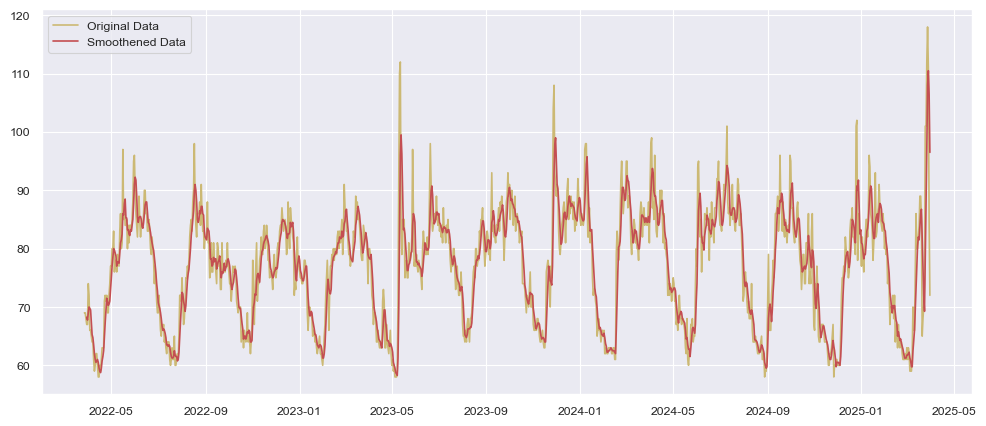

In [20]:
plt.figure(figsize=(12,5))

plt.plot(data.index,data['Values'],c='y',label='Original Data')
plt.plot(data.index,data['smoothened'],c='r',label='Smoothened Data')
plt.legend();

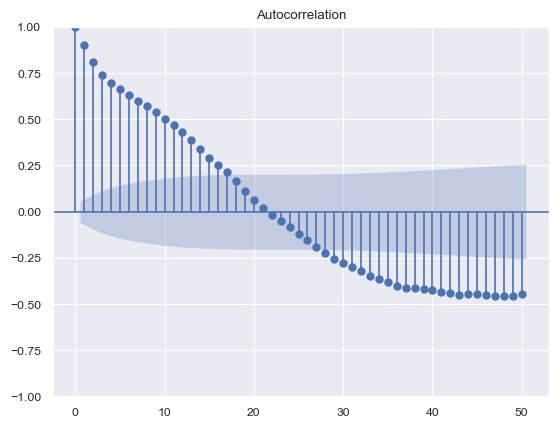

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(data['Values'],lags=50);

From the above ACF plot, there is a slow, sinusoidal decay indicating a seasonal pattern and there is no cutoff at any specific lag. 

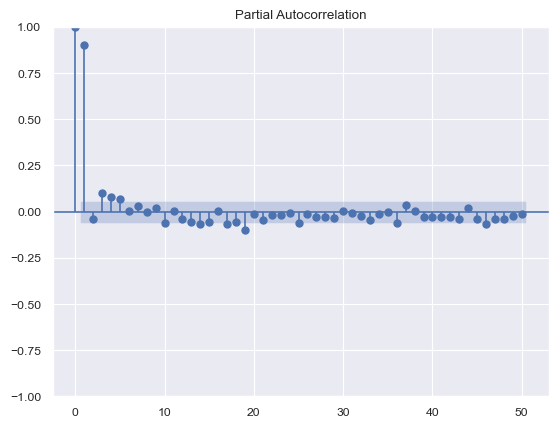

In [22]:
plot_pacf(data['Values'],lags=50);

From the above PACF plot, there is an immediate cut-off at lag 1 and no significant seasonal lags.

Test for stationarity in the data

In [23]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(data):
    _,p_val,_,_,_,_ = adfuller(data,regression='ct')

    if(p_val < 0.05):
        print(f'p-value is {p_val}. The null hypothesis is rejected. Hence data is stationary')
    else:
        print(f'p-value is {p_val}. The null hypothesis is accepted. Hence the data is non-stationary')

In [24]:
test_stationary(data['Values'])

p-value is 4.260476642680804e-09. The null hypothesis is rejected. Hence data is stationary


From the above test, we conclude that data is stationary. Since the data is stationary, there is no need of differencing the data

By analyzing the ACF, PACF plots, the estimated parameters are

<ul>
    <li>p = 1</li>
    <li>d = 0 (differencing is not needed due to stationarity)</li>
    <li>q = 0</li>
    <li>P = 0</li>
    <li>D = 0 (differencing is not needed due to stationarity)</li>
    <li>Q = 1</li>    
</ul>

In [25]:
train = data.loc['2022':'2025-03-21','Values'].values
test = data.tail(10)['Values'].values

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p,d,q = 1,0,0
P,D,Q,s = 0,0,1,4

model = SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,s),enforce_stationarity=False,enforce_invertibility=False)
res = model.fit()

In [27]:
print(res.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1091
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 4)   Log Likelihood               -3076.868
Date:                             Thu, 19 Jun 2025   AIC                           6159.736
Time:                                     13:33:12   BIC                           6174.707
Sample:                                          0   HQIC                          6165.403
                                            - 1091                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9987      0.001    680.001      0.000       0.996       1.002
ma.S.L4       -0.0363      

From the above summary, Akaike's Information Criteria(AIC), Schwartz Bayesian Criteria(BIC) and Hannan-Quinn Information Criteria(HQIC) are very high. So we need to perform hyperparameter tuning to select optimal parameters of SARIMA model to reduce the Information Criteria.

In [ ]:
import itertools

p = P = q = Q = range(0,3)
d = D = 0
s = 4

combinations = list(itertools.product(p,q,P,Q))

results = []

for (p_val,q_val,P_val,Q_val) in combinations:
    try:
        model = SARIMAX(train,order=(p_val,d,q_val),seasonal_order=(P_val,D,Q_val,s),enforce_invertibility=False,enforce_stationarity=False)

        fit_model = model.fit(disp=False)

        results.append({
            'order':(p_val,d,q_val),
            'seasonal_order':(P_val,D,Q_val),
            'AIC':fit_model.aic,
            'BIC':fit_model.bic,
            'HQIC':fit_model.hqic
        })
    except Exception as e:
        continue

In [29]:
result_df = pd.DataFrame(results)
result_df

,order,seasonal_order,AIC,BIC,HQIC
0,"(0, 0, 0)","(0, 0, 0)",12578.986904,12583.980837,12580.876990
1,"(0, 0, 0)","(0, 0, 1)",11208.542352,11218.522865,11212.320421
2,"(0, 0, 0)","(0, 0, 2)",10184.359738,10199.319437,10190.023673
3,"(0, 0, 0)","(1, 0, 0)",7280.453841,7290.436194,7284.232436
4,"(0, 0, 0)","(1, 0, 1)",7223.420307,7238.391076,7229.087410
...,...,...,...,...,...
76,"(2, 0, 2)","(1, 0, 1)",6106.302936,6141.221828,6119.522485
77,"(2, 0, 2)","(1, 0, 2)",6088.840415,6128.718145,6103.940005
78,"(2, 0, 2)","(2, 0, 0)",6431.368708,6466.268201,6444.582704
79,"(2, 0, 2)","(2, 0, 1)",6095.349355,6135.234489,6110.451065


In [30]:
best_model = result_df.sort_values('AIC').reset_index(drop=True)
best_model

,order,seasonal_order,AIC,BIC,HQIC
0,"(1, 0, 2)","(0, 0, 2)",6088.620077,6118.528375,6099.944769
1,"(2, 0, 2)","(1, 0, 2)",6088.840415,6128.718145,6103.940005
2,"(2, 0, 2)","(0, 0, 2)",6090.065025,6124.958039,6103.277166
3,"(1, 0, 2)","(1, 0, 2)",6090.595245,6125.488260,6103.807387
4,"(1, 0, 2)","(2, 0, 2)",6092.585657,6132.463388,6107.685247
...,...,...,...,...,...
76,"(0, 0, 0)","(0, 0, 2)",10184.359738,10199.319437,10190.023673
77,"(0, 0, 2)","(0, 0, 0)",10213.124829,10228.101119,10218.793512
78,"(0, 0, 1)","(0, 0, 0)",11141.883194,11151.869224,11145.662841
79,"(0, 0, 0)","(0, 0, 1)",11208.542352,11218.522865,11212.320421


After performing hyperparameter tuning, there is no significant change in AIC,BIC and HQIC. So we take the parameters with least AIC.

In [31]:
best_model.head(1)

,order,seasonal_order,AIC,BIC,HQIC
0,"(1, 0, 2)","(0, 0, 2)",6088.620077,6118.528375,6099.944769


In [32]:
model = SARIMAX(train,order=(1,0,2),seasonal_order=(0,0,2,4),enforce_invertibility=False,enforce_stationarity=False)

res = model.fit()

In [33]:
print(res.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1091
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 4)   Log Likelihood               -3038.310
Date:                           Thu, 19 Jun 2025   AIC                           6088.620
Time:                                   13:34:20   BIC                           6118.528
Sample:                                        0   HQIC                          6099.945
                                          - 1091                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.001    829.659      0.000       0.997       1.002
ma.L1         -0.1011      0.022     -4.701

Let's forecast the model

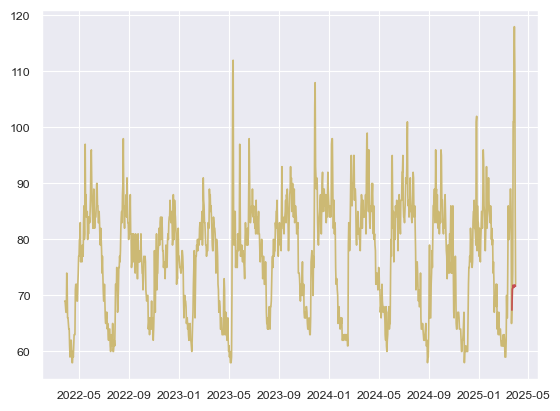

In [34]:
plt.plot(data.index,data['Values'].values,c='y')
plt.plot(data.tail(10).index,res.forecast(10),c='r');

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

r2_score(data.tail(10)['Values'].values,res.forecast(10))
mean_squared_error(data.tail(10)['Values'].values,res.forecast(10))

-1.1105785112229811